In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from pathlib import Path

In [2]:
save_path = Path('save/rbm/mnist')

with open(save_path / 'mmd' / '1' / 'results.pkl', 'rb') as f:
    results = pickle.load(f)
    log_mmds = results['log_mmds']

sampler_names = {
    'bg-1': 'Gibbs \n1',
    'bg-2': 'Gibbs \n2',
    'hb-10-1': 'HB \n10-1',
    'gwg': 'GWG',
    'gwg-3': 'GWG \n3',
    'gwg-5': 'GWG \n5',
    'gibbs': 'Block \nGibbs'
}

data = []
for i in range(8):
    seed_path = save_path / str(i) / 'results.pkl'
    with open(seed_path, 'rb') as f:
        results = pickle.load(f)
        for sampler, sampler_name in sampler_names.items():
            ess_values = results['ess'][sampler]
            for ess in ess_values:
                data.append({
                    'seed': i,
                    'sampler_name': sampler_name,
                    'log_ess': np.log(ess)
                })

df = pd.DataFrame(data)
df = df.groupby(['sampler_name', 'seed']).mean()

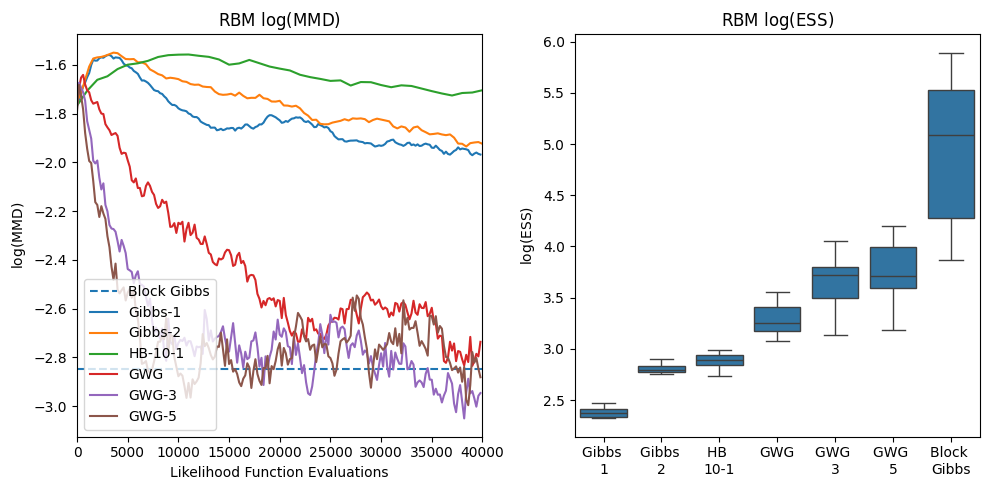

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

iterations = np.arange(0, 20000, 100)
axs[0].axhline(y=np.mean(log_mmds['gibbs'][100:]), linestyle='--', label='Block Gibbs')
axs[0].plot(iterations * 2, log_mmds['bg-1'], label='Gibbs-1')
axs[0].plot(iterations * 4, log_mmds['bg-2'], label='Gibbs-2')
axs[0].plot(iterations * 10, log_mmds['hb-10-1'], label='HB-10-1')
axs[0].plot(iterations * 2, log_mmds['gwg'], label='GWG')
axs[0].plot(iterations * 2, log_mmds['gwg-3'], label='GWG-3')
axs[0].plot(iterations * 2, log_mmds['gwg-5'], label='GWG-5')
axs[0].legend(loc='lower left')
axs[0].set_xlim(0, 40000)
axs[0].set_xlabel("Likelihood Function Evaluations")
axs[0].set_ylabel(r"$\log(\mathrm{MMD})$")
axs[0].set_title(r"RBM $\log(\mathrm{MMD})$")

sns.boxplot(data=df, x='sampler_name', y='log_ess', order=sampler_names.values(), ax=axs[1])
axs[1].set_xlabel("")
axs[1].set_ylabel(r"$\log(\mathrm{ESS})$")
axs[1].set_title(r"RBM $\log(\mathrm{ESS})$")

plt.tight_layout()
plt.show()